#### 기계학습             
202020986 이승진

##### 문제 정의
제주 지역을 여행하는 내국인의 소비 데이터 ((제주특별자치도_제주지역_내국인_유형별_관광_업종_결제데이터_20170216.csv))를 이용해서
연령별 소비 카테고리를 클러스터링 분석을 통해 나이대별로 어느 카테고리에 소비를 많이 하는지 분석해
제주 지역 산업을 보다 발전시킨다.

20대는 문화/레져, 유흥    
30대는 쇼핑    
40대는 숙박에서 소비를 많이 할 것으로 예상된다.



##### 데이터 로드

In [25]:
import pandas as pd

# CSV 파일 로드
file_path = "제주특별자치도_제주지역_내국인_유형별_관광_업종_결제데이터_20170216.csv"
data0 = pd.read_csv(file_path, encoding='cp949')

# 데이터 확인
data0.head()

,지역구분,지역구분_시,지역구분_도심/도심외,지역구분_읍/면/동,관광업종 구분,회원 유형,회원 성별,회원 연령대,회원 거주지,2014-09~2015-08 카드이용금액,2014-09 ~ 2015-08 카드이용건수,2014-09~2015-08 카드이용자수,2015-09~2016-08 카드이용금액,2015-09~2016-08 카드이용건수,2015-09~2016-08 카드이용자수,데이터기준일자
0,제주도,전체,전체,전체,교통,내국인,남,20대 미만,제주,19650725,479,68,29843198,851,197,2017-02-16
1,제주도,전체,전체,전체,교통,내국인,남,20대,제주,2089069468,56192,6528,2711132135,73278,7948,2017-02-16
2,제주도,전체,전체,전체,교통,내국인,남,30대,제주,10164021228,205373,15016,10459317336,220460,15330,2017-02-16
3,제주도,전체,전체,전체,교통,내국인,남,40대,제주,22623678695,367138,20886,20797744658,368599,21333,2017-02-16
4,제주도,전체,전체,전체,교통,내국인,남,50대,제주,24392770471,361576,19359,20730544586,358093,19643,2017-02-16


#### 전처리 (결측치 삭제)

In [26]:
# 결측치가 있는 행 삭제
data_cleaned = data0.dropna()

# 삭제된 행의 수 확인
deleted_rows = len(data0) - len(data_cleaned)
print("삭제된 행의 수:", deleted_rows)

# 삭제된 행이 어떤 데이터였는지 확인
print("삭제된 행의 데이터:")
print(data0[data0.isnull().any(axis=1)])


삭제된 행의 수: 0
삭제된 행의 데이터:
Empty DataFrame
Columns: [지역구분, 지역구분_시, 지역구분_도심/도심외, 지역구분_읍/면/동, 관광업종 구분, 회원 유형, 회원 성별, 회원 연령대, 회원 거주지, 2014-09~2015-08 카드이용금액, 2014-09 ~ 2015-08 카드이용건수, 2014-09~2015-08 카드이용자수, 2015-09~2016-08 카드이용금액, 2015-09~2016-08 카드이용건수, 2015-09~2016-08 카드이용자수, 데이터기준일자]
Index: []


제주 지역에 여행을 가는 분들을 대상으로 분석을 하는 것이기 때문에    
제주지역에 거주하고 있는 분들의 결제 데이터는 삭제한다.    
그리고 <b>클러스터링을 할 변수</b>를 설정한다.

In [27]:
# 데이터 프레임 'data'에서 '제주'를 제외한 데이터 추출
data1 = data0[(data0['회원 거주지'] != '제주')]

# 사용할 열 선택
selected_columns = ['관광업종 구분', '회원 연령대', '2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']
data_selected = data1[selected_columns]
data_selected.head()

,관광업종 구분,회원 연령대,2014-09~2015-08 카드이용금액,2015-09~2016-08 카드이용금액
84,교통,20대 미만,4996012,20680973
85,교통,20대,3471476430,5440342564
86,교통,30대,12222560526,14288412960
87,교통,40대,12615797032,14654711931
88,교통,50대,9426160316,10582888267


관광업종 구분과 회원 연령대는 문자열 데이터이다.     
때문에 각각의 문자열 데이터를 인코딩한다.

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# 관광업종 구분 데이터 변환
tourism_categories = ["교통", "문화/레져", "소매", "쇼핑", "숙박", "식음료", "유흥"]
encoded_tourism_categories = label_encoder.fit_transform(tourism_categories)
tourism_category_mapping = dict(zip(tourism_categories, encoded_tourism_categories))
data_selected['encoded_tourism_categories'] = data_selected['관광업종 구분'].map(tourism_category_mapping)

# 회원 연령대 수동 매핑
age_group_mapping = {
    "20대 미만": 0,
    "20대": 1,
    "30대": 2,
    "40대": 3,
    "50대": 4,
    "60대이상": 5
}

# 데이터에 수동 매핑 적용
data_selected['encoded_age_groups'] = data_selected['회원 연령대'].map(age_group_mapping)

# 결과 출력
print("Encoded tourism categories:", tourism_category_mapping)
print("Encoded age groups:", age_group_mapping)


Encoded tourism categories: {'교통': 0, '문화/레져': 1, '소매': 2, '쇼핑': 3, '숙박': 4, '식음료': 5, '유흥': 6}
Encoded age groups: {'20대 미만': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대이상': 5}


/tmp/ipykernel_1768/2536406411.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['encoded_tourism_categories'] = data_selected['관광업종 구분'].map(tourism_category_mapping)
/tmp/ipykernel_1768/2536406411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['encoded_age_groups'] = data_selected['회원 연령대'].map(age_group_mapping)


#### 엘보우 방법을 통한 k-means 클러스터 k 개수 설정

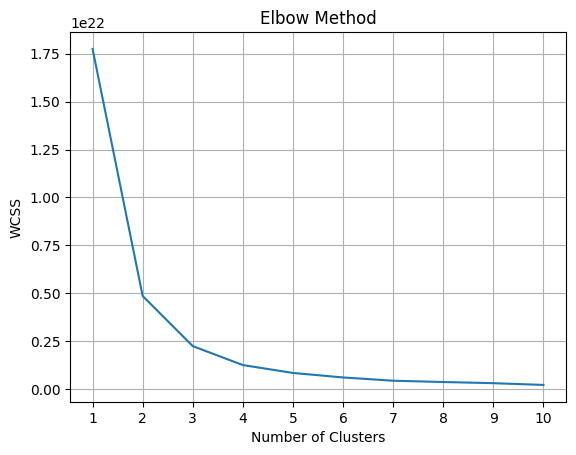

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터셋 준비
X = data_selected[['encoded_tourism_categories', 'encoded_age_groups', '2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']].values

# 클러스터 개수에 따른 WCSS 계산
wcss = []
for i in range(1, 11):  # 클러스터 개수를 1부터 10까지 변화시켜가며 WCSS를 계산
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# WCSS를 그래프로 나타내기
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


#### 클러스터링 수행, 시각화
k-means 클러스터링의 k값을 3으로 설정한다.    
그리고 각각의 클러스터의 중심점을 출력한다.

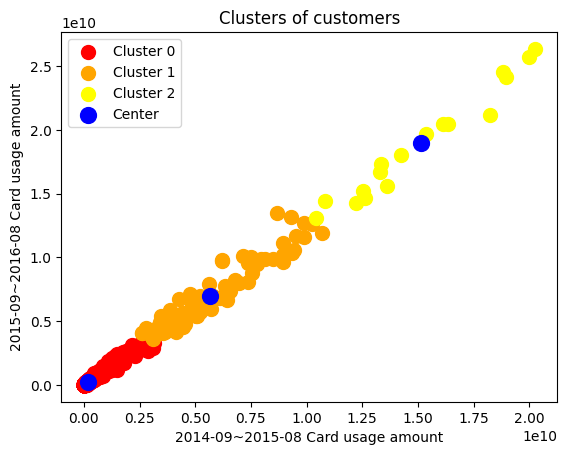

Cluster Centers:
[[2.85832138e+00 2.83034433e+00 1.72909967e+08 2.13836882e+08]
 [2.62962963e+00 2.88888889e+00 5.65985977e+09 6.98018740e+09]
 [3.23529412e+00 2.82352941e+00 1.51283820e+10 1.89353255e+10]]


In [30]:
from sklearn.cluster import KMeans
# K = 3으로 설정

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 클러스터링 결과 시각화
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='red', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='orange', label='Cluster 1')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s=100, c='yellow', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=130, c='blue', label='Center')
plt.title('Clusters of customers')
plt.xlabel('2014-09~2015-08 Card usage amount')
plt.ylabel('2015-09~2016-08 Card usage amount')
plt.legend()
plt.show()

# 클러스터링 중심점 출력
print("Cluster Centers:")
print(kmeans.cluster_centers_)

#### Cluster 0
encoded_tourism_categories : 2.8(쇼핑)    
encoded_age_groups : 2.8(40대)    
2014-09~2015-08 카드이용금액 : 1억 7천만   
2015-09~2016-08 카드이용금액 : 2억 1천만

Cluster 1은 제주 지역에서 결제를 많이 하지 않은 그룹이다.    
이는 <b>제주 지역에 여행을 간 그룹</b>으로 해석될 수 있다.

#### Cluster 1
encoded_tourism_categories : 2.6(쇼핑)    
encoded_age_groups : 2.8(40대)    
2014-09~2015-08 카드이용금액 : 56억 5천만    
2015-09~2016-08 카드이용금액 : 69억 8천만

Cluster 2는 제주 지역에서 결제를 중간 정도 한 그룹이다.    
이는 <b>제주 지역에 출장을 가거나 한달살기, 워케이션을 간 그룹</b>으로 해석될 수 있다.

#### Cluster 2
encoded_tourism_categories : 3.2(쇼핑)    
encoded_age_groups : 2.8(40대)    
2014-09~2015-08 카드이용금액 : 151억 2천만     
2015-09~2016-08 카드이용금액 : 189억 3천만

Cluster 3은 제주 지역에서 결제를 많이 한 그룹이다.    
이는 <b>제주 지역에 주소지를 가지고 있지는 않지만 제주지역에 살고 있는 그룹</b>으로 해석될 수 있다.

단 encoded_tourism_categories 와 encoded_age_groups 는 임의로 인코딩한 값이기 때문에 오류가 있다.    
따라서 이 부분에 대해서 뒤에서 다시 분석을 해야 한다.

#### 실루엣 점수 계산 및 출력
0.93으로 실루엣 점수가 높은 편이다.    
클러스터링은 제대로 수행됬다고 볼 수 있다.    
이는 앞서 그룹별로 해석한 결과가 아닐지라도 그룹별로 제주지역에서 결제를 한 이유와 목적이 명확하다는 의미이다.

In [31]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print("The average silhouette score:", silhouette_avg)

The average silhouette score: 0.932844809218738


앞서 다룬 클러스터링 중심점에 encoded_tourism_categories 와 encoded_age_groups 는 오류가 있다.    
따라서 분산과 정규분포표를 이용해 다시 분석한다.

In [32]:
import pandas as pd
import numpy as np

# 클러스터별로 데이터를 그룹화
data_selected['Cluster'] = y_kmeans
clusters = data_selected.groupby('Cluster')

# 각 클러스터 내에서 'encoded_tourism_categories' 및 'encoded_age_groups'의 분산 계산
means = clusters[['encoded_tourism_categories', 'encoded_age_groups']].mean()
variances = clusters[['encoded_tourism_categories', 'encoded_age_groups']].var()

# 분산 출력
print("Variance within each cluster:")
print(variances)


Variance within each cluster:
         encoded_tourism_categories  encoded_age_groups
Cluster                                                
0                          3.587024            2.224884
1                          3.286111            1.850000
2                          2.316176            0.654412


/tmp/ipykernel_1768/976795927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = y_kmeans


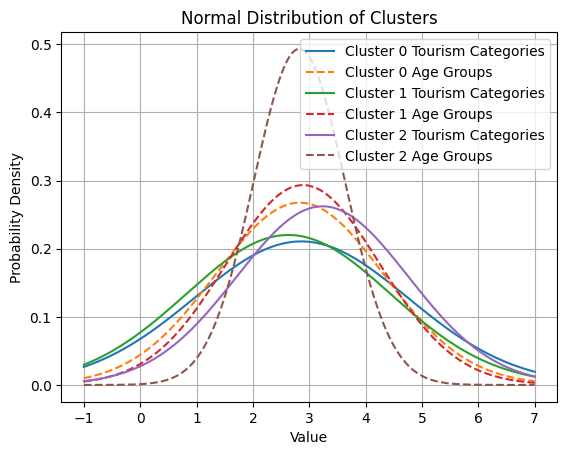

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 정규분포 그래프를 그림
x = np.linspace(-1, 7, 1000)

# 각 클러스터에 대한 정규분포 그래프 그리기
for cluster in range(kmeans.n_clusters):
    mean = means.iloc[cluster]
    variance = variances.iloc[cluster]
    
    # 'encoded_tourism_categories'에 대한 정규분포
    y = norm.pdf(x, mean['encoded_tourism_categories'], np.sqrt(variance['encoded_tourism_categories']))
    plt.plot(x, y, label=f'Cluster {cluster} Tourism Categories')
    
    # 'encoded_age_groups'에 대한 정규분포
    y = norm.pdf(x, mean['encoded_age_groups'], np.sqrt(variance['encoded_age_groups']))
    plt.plot(x, y, '--', label=f'Cluster {cluster} Age Groups')

plt.title('Normal Distribution of Clusters')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


2개의 인코딩된 변수에 대한 평균 값과 분산 값과은 다음과 같다.    
Cluster 0    
age_groups : 2.83 2.24    
tourism_categories : 2.85, 3.58    

Cluster 1    
age_groups : 2.88 , 1.85    
tourism_categories : 2.62 , 3.28    

Cluster 2    
age_groups : 2.82 , 0.65    
tourism_categories : 3.23 , 2.31    

Cluster 0 : 결제가 적은 그룹      
비교적 낮은 나이대에서 비교적 다양한 카테고리의 소비를 한다.    

Cluster 1 : 결제가 보통인 그룹    
비교적 중간 나이대에서 비교적 다양한 카테고리의 소비를 한다.    

Cluster 2 : 결제가 많은 그룹    
비교적 많은 나이대에서 비교적 다양하지 않은 카테고리의 소비를 한다.    

In [42]:
# Cluster 0 그룹
one = data_selected[data_selected['Cluster'] == 0]
print(one[selected_columns])

     관광업종 구분  회원 연령대  2014-09~2015-08 카드이용금액  2015-09~2016-08 카드이용금액
84        교통  20대 미만                 4996012                20680973
90        교통  20대 미만                10555451                16091393
95        교통   60대이상              1807891492              1789050029
96     문화/레져  20대 미만                10690094                23566755
97     문화/레져     20대               902604530              1114214069
...      ...     ...                     ...                     ...
6105     식음료     20대                74464420               111280350
6106     식음료     30대               124836280               158482940
6107     식음료     40대                70466940                96188880
6108     식음료     50대                41606210                52633750
6109     식음료   60대이상                16031700                19697950

[2788 rows x 4 columns]


In [43]:
# Cluster 1 그룹
two = data_selected[data_selected['Cluster'] == 1]
print(two[selected_columns])

     관광업종 구분 회원 연령대  2014-09~2015-08 카드이용금액  2015-09~2016-08 카드이용금액
85        교통    20대              3471476430              5440342564
88        교통    50대              9426160316             10582888267
89        교통  60대이상              4433518940              4508363246
91        교통    20대              4765244169              7103684934
92        교통    30대              9363741719             10308275324
...      ...    ...                     ...                     ...
3896      쇼핑    20대              5627974544              7913857365
3897      쇼핑    30대             10674574834             11944699578
3898      쇼핑    40대              7377952564              9543757012
3899      쇼핑    50대              6347163518              7788792500
3900      쇼핑  60대이상              3098798082              3594760838

[81 rows x 4 columns]


In [44]:
# Cluster 2 그룹
three = data_selected[data_selected['Cluster'] == 2]
print(three[selected_columns])

    관광업종 구분 회원 연령대  2014-09~2015-08 카드이용금액  2015-09~2016-08 카드이용금액
86       교통    30대             12222560526             14288412960
87       교통    40대             12615797032             14654711931
122      쇼핑    30대             18960128273             24180337863
123      쇼핑    40대             19990086443             25718622603
124      쇼핑    50대             16330477242             20450263194
128      쇼핑    30대             18244505940             21203366876
129      쇼핑    40대             13347231675             17298052990
130      쇼핑    50대             10441861624             13127172202
146     식음료    30대             18810603666             24503122801
147     식음료    40대             20243721889             26350774257
148     식음료    50대             16120676529             20473851942
152     식음료    30대             15374784861             19709730870
153     식음료    40대             10808526450             14413786619
444      쇼핑    30대             13304340723             1669686